<a href="https://colab.research.google.com/github/paco415/Cuenta-Bancaria/blob/main/Cuenta_Bancaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy-financial

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
class CuentaBancaria:

    def __init__(self,numero,cliente,saldo,estado):
        self.numero = numero
        self.cliente = cliente
        self.saldo = saldo
        self.estado = estado

    def depositar(self,cantidad):
        """
        Deposita cierta cantidad de dinero en la cuenta

        :cantidad: Cantidad de dinero a depositar.
        """
        if self.estado and cantidad > 0:
            self.saldo += cantidad
            print(f"Deposito exitoso. Nuevo saldo: {self.saldo}")
        else:
            print("Deposito no valido o cuenta inactiva.")

    def retirar(self, cantidad):
        """
        Retira cierta cantidad de dinero de la cuenta.

        :cantidad: Cantidad de dinero a retirar.
        """

        if self.estado and cantidad >0 and self.saldo >= cantidad:
            self.saldo -= cantidad
            print(f"Retiro exitoso. Nuevo saldo: {self.saldo}")
        elif cantidad > self.saldo:
            print("Fondos insuficientes para el retiro")
        else:
            print("Retiro no valido o cuenta inactiva")



In [ ]:
# Ejemplo de uso
cuenta = CuentaBancaria(numero=12345, cliente="Paulina", saldo=34850, estado=True)

In [ ]:
# Realizar un depósito
cuenta.depositar(0)

Deposito no valido o cuenta inactiva.


In [ ]:
cuenta.retirar(17150)                         # HSBC 17150

Retiro exitoso. Nuevo saldo: 17700


In [ ]:
# Intentar retirar mas de lo que hay en la cuenta
cuenta.retirar(20000)

Fondos insuficientes para el retiro


In [ ]:
cuenta.retirar(2000)

Retiro exitoso. Nuevo saldo: 15700


In [ ]:
cuenta.retirar(7850)

Retiro exitoso. Nuevo saldo: 7850


##### Medium Daily Digest   29 sept 04

##### Cuenta Personal

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import messagebox

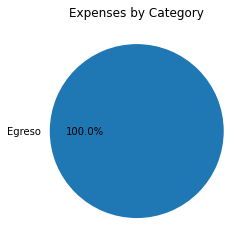

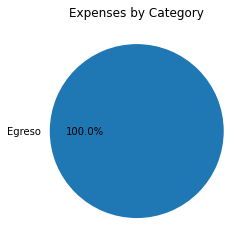

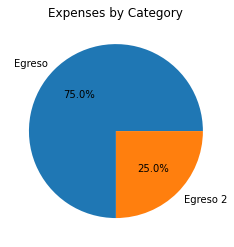

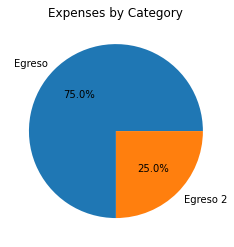

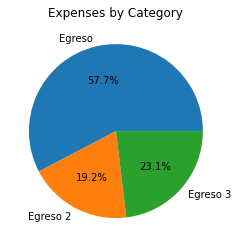

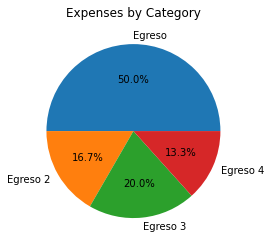

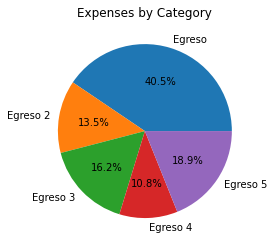

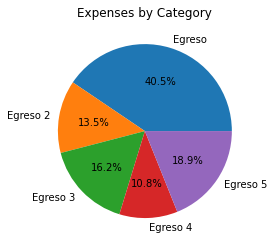

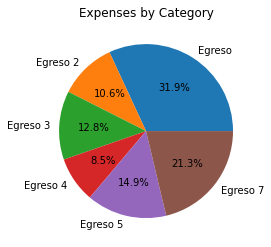

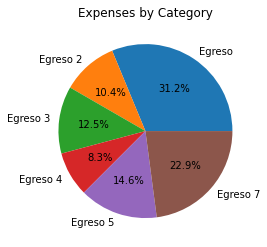

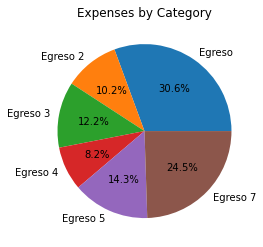

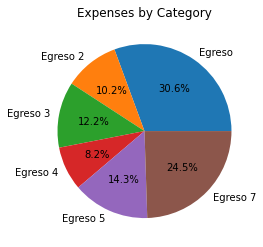

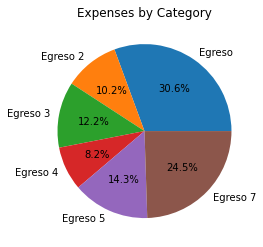

In [ ]:
# Inicializar DataFrame global
datos = pd.DataFrame(columns=[ 'Date', 'Category', 'Amount'])

# Agregar transacción función
def add_transaction (date, category, amount):
    global datos
    try:
        datos.loc[len(datos)] = [date, category, float(amount)]
        messagebox.showinfo("Success","Transaction added succesfully!")
    except ValueError:
        messagebox.showerror("Error", "Invalid input! , Please check the amount")

    # Generar informe función
def generate_report():
    if datos.empty:
        return messagebox.showinfo('No Data',' No transactions available')

    total_income = datos[datos['Amount'] > 0]['Amount'].sum()
    total_expenses = datos[datos['Amount'] < 0]['Amount'].sum()

    summary = (f"Total Income: ${total_income}\n"
               f" Total Expenses: ${abs(total_expenses)}\n"
               f" Balance : ${total_income + total_expenses}")

    messagebox.showinfo("Summary Report",summary)

    # Generar gráfico de pie de los gastos por categoría
    datos_gastos = datos[datos["Amount"]< 0].groupby("Category")["Amount"].sum().abs()

    if not datos_gastos.empty:
        datos_gastos.plot.pie(autopct="%1.1f%%")
        plt.title("Expenses by Category")
        plt.ylabel('')
        plt.show()
    else:
        messagebox.showinfo("No Expenses","No expenses to show")

# GUI Transaction Handling
def add_transaction_gui():
    try:
        add_transaction(date_entry.get(),category_entry.get(),
                        float(amount_entry.get()))
    except ValueError:
        messagebox.showerror("Input Error","Amount must be a valid number")

 # Set up GUI ( Configurar la GUI)
app = tk.Tk()
app.title("Finance Tracker")

# Crear etiquetas y entradas para la GUI
tk.Label(app, text="Date (YYYY-MM-DD):").pack()
date_entry = tk.Entry(app)
date_entry.pack()

tk.Label(app, text="Category").pack()
category_entry = tk.Entry(app)
category_entry.pack()

tk.Label(app, text="Amount").pack()
amount_entry = tk.Entry(app)
amount_entry.pack()

# Botones para agregar transacción y generar informe
tk.Button(app, text="Add Transaction", command=add_transaction_gui).pack()
tk.Button(app, text="Generate Report", command=generate_report).pack()

# Iniciar la aplicación
app.mainloop()


In [ ]:
# El reporte regresa el porcentaje de cada uno de los gastos y costos sobre la base
# de los gastos totales
